# End-to-end causal inference project

*Big thanks to Heather Heck and Qian Deng, who worked with me on this project*

In this notebook, I will follow a real-world experiment from question forumation to results in the following steps:

1. Forumalte question
2. Collect data
3. Clean data
4. Analyze data
5. Summaraize results

## 1. Forumulate question

*This information is adapted from "Mostly Harmless Econometrics" by J. Angrist and J. Pischke, chapter 1*

A good question is one that you can answer. That may sound obvious, but there are some common pitfalls that lead to "fundamentally unanswerable questions", or FUQs.

If you have a good question, you can answer these questions:

##### 1. What is the causal relationship of interest?

##### 2. What is the perfect, ideal experiment that could answer this question?

##### 3. How will you identify the effect?

##### 4. What is your mode of inference?

##### 5. Why is this question important?

### As an example:

**Not great:** *How do customers feel about our product?* 

    - There is no cause and effect question here, which will make the question difficult to answer experimentally. 
    - What kind of experiemnt could you design to answer this? Will you straight up ask customers how they feel? How will you find your pool of customers?
    - What is the indicator for how customers feel? Is it response to questions? Is it sales numbers?
    - Does the company care how customers feel if it doesn't affect sales?

**Better** *How does changing the color of the packaging affect sales?* 

    - Here, the relationship of interest is very clear. 
    - This question could be answered with A/B testing.
    - The effect will be quantitatively measurable. 
    - Virtually all companies care about sales and how they can be increased.


This leads me to the question that prompted this experiment:

### Question: Does the presence of difficulty lables on an exam improve the score of the test-taker?

##### 1. What is the causal relationship of interest?

The relationship of interest is the presence or absence of difficulty lables on exam scores. 

##### 2. What is the perfect, ideal experiment that could answer this question?

A randomized sample, where the control group is given a general-knowledge exam without lables. The treatment group is given the same exam, but with the difficulty of each question labeled. 

##### 3. How will you identify the effect?

The plan is to compare the scores of the control and treatment group. 

##### 4. What is your mode of inference?

One can infer that the diffuclty lables helped the test-taker if the treatment group scores significantly higher than the control group. 

##### 5. Why is this question important?
   The answer to this question would be useful for educational institutions; teachers could improve their students' accuracy rate on tests and homework by providing the difficulty. Similarly, many professions require problem solving abilities; companies may want to know if there is a benefit to revealing the true difficulty of a problem. If so, they may want to inform their employees of the difficulties beforehand to improve their employees' ability to solve the problems.
   
   Prior research notes that adaptive test (tests that get harder as you go along) tend to improve students’ learning outcomes (Heitmann). On the other hand, additional research suggests that the adaptive tests create anxiety when it comes to difficult questions (Ponsoda). Our experiment can help us understand whether the performance improvements from the difficulty-adaptive tests are due entirely to the adaptiveness of the tests, or if the psychological experience of having some idea of question difficulty can play a helpful role as well. 


## 2. Collect Data

   My team and I designed a survey of 15 multiple choice questions, each of which were ranked as easy, medium, hard, or very hard. For the curious, the questions (and answers) are posted at the end of this article.

   The survey was designed such that anyone with a link could take the survey. When clicked, the link would randomly assign the subject to treatment or control, with 50% in each group. This link was sent to the team's friends, family, and colleagues.

   To deter cheating, we included two honesty questions.  At the beginning of the survey, subjects were asked to certify that they would not search the internet for answers.  At the end of the survey, they were asked if they searched the internet for answers.  In addition to the honesty questions, the subjects were asked a series of demographics questions regarding: gender, years of schooling, household income, location, employment status, and age.  We also asked how difficult they found the survey and how stressed they feel compared to the previous 6 months.  These types of questions will allow for blocking during analysis if needed.
   
#### How many subjects will we need?

  Without enough subjects, the study may lack statistical power. Statistical power is the likelihood that a study will detect an effect when there is an effect there to be detected. If statistical power is high, the probability of making a Type II error (concluding there is no effect when there is one) goes down. Bigger effects are easier to dectect, and therefore need fewer samples to achieve significance. Smaller effects require larger samples sizes to see the significant difference. 

   By making some assumptions, one can pre-calculate how many observations are needed to find significant results (if significant differences exist).  To estimate how many responses are needed, the following assumptions were made:
   - The average respondent will answer 10/15 correct without difficulty labels.  
   - Standard deviation will be 2 questions or 2/15.  
   - The impact (tau) of the difficulty ratings as 1 question or 1/15.  
   
   By looking at the graph below, if these assumptions turned out to be true, then approximately 215 respondents are needed to find significant results. 

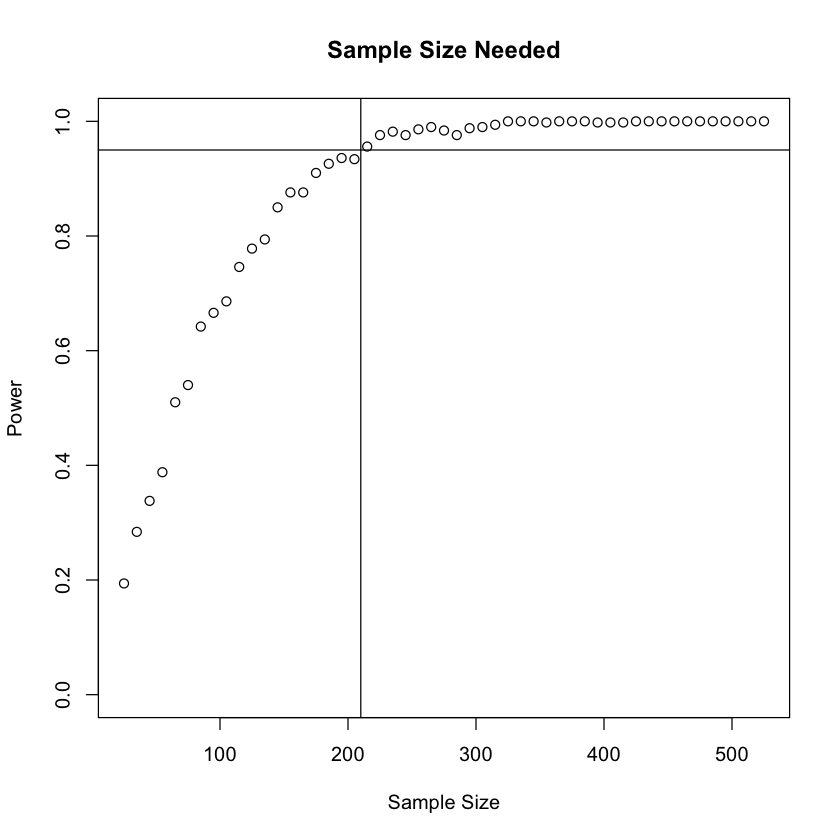

In [1]:
possible.ns <- seq(from=25, to=525, by=10)     # The sample sizes we'll be considering
powers <- rep(NA, length(possible.ns))           # Empty object to collect simulation estimates
alpha <- 0.05                                    # Standard significance level
sims <- 500                                      # Number of simulations to conduct for each N

#### Outer loop to vary the number of subjects ####
for (j in 1:length(possible.ns)){
  N <- possible.ns[j]                              # Pick the jth value for N
  
  significant.experiments <- rep(NA, sims)         # Empty object to count significant experiments
  
  #### Inner loop to conduct experiments "sims" times over for each N ####
  for (i in 1:sims){
    Y0 <- rnorm(n=N, mean=2/3*100, sd=2/15*100)    # control potential outcome
    tau <- 1/15*100                                # Hypothesize treatment effect
    Y1 <- Y0 + tau                                 # treatment potential outcome
    Z.sim <- rbinom(n=N, size=1, prob=.5)          # Do a random assignment
    Y.sim <- Y1*Z.sim + Y0*(1-Z.sim)               # Reveal outcomes according to assignment
    fit.sim <- lm(Y.sim ~ Z.sim)                   # Do analysis (Simple regression)
    p.value <- summary(fit.sim)$coefficients[2,4]  # Extract p-values
    significant.experiments[i] <- (p.value <= alpha) # Determine significance according to p <= 0.05
  }
  
  powers[j] <- mean(significant.experiments)       # store average success rate (power) for each N
}
plot(possible.ns, powers, ylim=c(0,1), xlab = "Sample Size", ylab = "Power",
    main = "Sample Size Needed")
abline(v = 210)
abline(h = 0.95)

By contrast, if the impact (tau) of the difficulty ratings is 2 questions or 2/15, then 65 respondents are needed.

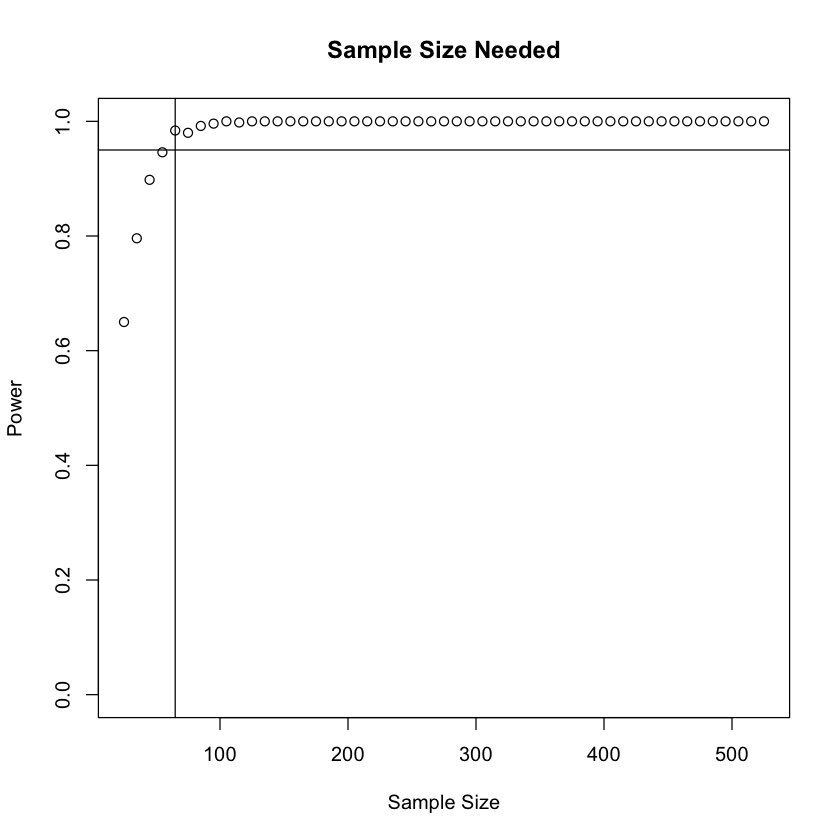

In [2]:
possible.ns <- seq(from=25, to=525, by=10)     # The sample sizes we'll be considering
powers <- rep(NA, length(possible.ns))           # Empty object to collect simulation estimates
alpha <- 0.05                                    # Standard significance level
sims <- 500                                      # Number of simulations to conduct for each N

#### Outer loop to vary the number of subjects ####
for (j in 1:length(possible.ns)){
  N <- possible.ns[j]                              # Pick the jth value for N
  
  significant.experiments <- rep(NA, sims)         # Empty object to count significant experiments
  
  #### Inner loop to conduct experiments "sims" times over for each N ####
  for (i in 1:sims){
    Y0 <- rnorm(n=N, mean=2/3*100, sd=2/15*100)    # control potential outcome
    tau <- 2/15*100                                # Hypothesize treatment effect
    Y1 <- Y0 + tau                                 # treatment potential outcome
    Z.sim <- rbinom(n=N, size=1, prob=.5)          # Do a random assignment
    Y.sim <- Y1*Z.sim + Y0*(1-Z.sim)               # Reveal outcomes according to assignment
    fit.sim <- lm(Y.sim ~ Z.sim)                   # Do analysis (Simple regression)
    p.value <- summary(fit.sim)$coefficients[2,4]  # Extract p-values
    significant.experiments[i] <- (p.value <= alpha) # Determine significance according to p <= 0.05
  }
  
  powers[j] <- mean(significant.experiments)       # store average success rate (power) for each N
}

plot(possible.ns, powers, ylim=c(0,1), xlab = "Sample Size", ylab = "Power",
    main = "Sample Size Needed")
abline(v = 65)
abline(h = 0.95)

## 3. Clean Data

Because our survey came as simply answers to questions, the following code was needed to clean the data to a usable form:

In [ ]:
##### Getting Started ##### 

# Install packages
library(tidyverse)

# Import data
df <- read_csv("results.csv")

# Drop unneeded cols
drop_list <- c('StartDate','EndDate','Status','DistributionChannel','Timer_First Click','Timer_Last Click',
               'Timer_Page Submit','Timer_Click Count', "UserLanguage",'S1','S2','S3','S4','S5','S6','S7','S8',
               'S9','S10','S11','S12','S13','S14','S15')
df <- df[,!(names(df) %in% drop_list)]

# Add sensible col names
df <- rename(df, honest1 = H1, challenge=Q37, education=D1, gender=D2, stress=D3, income=D4, location=D5,employment=D6,
      age=D7, honest2=Q43)





##### Impute score rather than answer#####
# The results came as the answer clicked rather than weather or not the answer was correct
df["C1"] <- as.numeric(df[7]==7)
df["C2"] <- as.numeric(df[8]=="10ft")
df["C3"] <- as.numeric(df[9]=="180 degrees")
df["C4"] <- as.numeric(df[10]=="Mary Shelley")
df["C5"] <- as.numeric(df[11]=="Controls")
df["C6"] <- as.numeric(df[12]==10)
df["C7"] <- as.numeric(df[13]=="significantly affecting the frequency of surgical errors, which already cost hospitals")
df["C8"] <- as.numeric(df[14]=="Louis Pasteur")
df["C9"] <- as.numeric(df[15]=="24 horses and 50 humans")
df["C10"] <- as.numeric(df[16]=="Maine")
df["C11"] <- as.numeric(df[17]=="Acura")
df["C12"] <- as.numeric(df[18]==60)
df["C13"] <- as.numeric(df[19]=="Helium")
df["C14"] <- as.numeric(df[20]=="He warned her calmly that he would shoot her if she didn't keep quiet.")
df["C15"] <- as.numeric(df[21]==24)



##### Calclulate results for total and for each subset, by sum and percentage #####
result_df <- df[,7:21]
result_df[is.na(result_df)] <- 0

df["Total"] <-rowSums(result_df)
df["Total_Pct"] <- df["Total"]/15*100

# Easy: C1, C2, C3
df["Easy"] <-rowSums(result_df[1:3], na.rm = TRUE)
df["Easy_Pct"] <- df["Easy"]/3*100

# Medium: C4, C5, C6, C7
df["Medium"] <-rowSums(result_df[4:7], na.rm = TRUE)
df["Medium_Pct"] <- df["Medium"]/4*100

# Hard: C8, C9, C10, C11, C12
df["Hard"] <-rowSums(result_df[8:12], na.rm = TRUE)
df["Hard_Pct"] <- df["Hard"]/5*100

# Very Hard: C13, C14, C15
df["Very_Hard"] <-rowSums(result_df[13:15], na.rm = TRUE)
df["Very_Hard_Pct"] <- df["Very_Hard"]/3*100

# Drop individual answer cols
drop_list <- c('C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15')
df <- df[,!(names(df) %in% drop_list)]




##### Convert ordered factor rows to numeric ##### 

# How challenging was this survey?
chal_level <- c("Slightly challenging", "Moderately challenging", "Very challenging", "Extremely challenging")
df$challenge <- as.numeric(factor(df$challenge, ordered = TRUE, levels = chal_level))

# education
edu_level <- c("Less than high school", "High school graudate","Some college", "2 year degree", "4 year degree", 
              'Master\'s degree', "Doctorate")
df$education <- as.numeric(factor(df$education, ordered = TRUE, levels = edu_level))

# stress
stress_level <- c('Much less stressed','A little less stressed','About the same','A little more stressed',
                  'A lot more stressed')
df$stress <- as.numeric(factor(df$stress, ordered = TRUE, levels = stress_level))

# Income
df$income[df$income == "Prefer not to say"] <- NA
income_level <- c('0−9,999','9,999−24,999','25,000−49,999','50,000−74,999','75,000−99,999','100,000−124,999',
                  '125,000−149,999','150,000−199,000','$200,000 +')
df$income <- as.numeric(factor(df$income, ordered = TRUE, levels = income_level))

# age
age_level <- c('Under 18','18 - 24','25 - 34','35 - 44','45 - 54','55 - 64','65 - 74')
df$age <- as.numeric(factor(df$age, ordered = TRUE, levels = age_level))




##### Other Cleanup #####

# Convert honesty questions to T/F
df["honest1"] <- as.numeric(df["honest1"]=="I promise not to search the internet for answer to this survey.")
df["honest2"] <- as.numeric(df["honest2"]=="Nope, I'm honest.")

# Convert gender to 0/1
df$gender[df$gender == "Other / Prefer not to say"] <- NA
df$gender <- as.numeric(df$gender=="Male")

# Convert location to multiple boolean cols
location_tbl <- tbl_df(model.matrix(~factor(location)-1,data=df))
colnames(location_tbl) <- c("mid_atlantic", "midwest", "mountain", "new_england", "ne_midwest", 
                            "not_usa", "pacific","south_atlantic", "west_south")
location_tbl$ResponseId <- df$ResponseId[!is.na(df$location)]
df <- left_join(df, location_tbl, by = "ResponseId")

# Convert employment to multiple boolean cols
emp_tbl <- tbl_df(model.matrix(~factor(employment)-1,data=df))
colnames(emp_tbl) <- c("ft_employed", "pt_employed", "unemployed_notlooking", 
                       "unemployed_looking", "retired", "student")
emp_tbl$ResponseId <- df$ResponseId[!is.na(df$employment)]
df <- left_join(df, emp_tbl, by = "ResponseId")
df$unemployed <- df$unemployed_notlooking + df$unemployed_looking

# Remove dishonest answers
df <- df[df$honest2==1,]

# Drop location, ft_employed, pt_employed, unemployed_notlooking, unemployed_looking, honesty1 and 2 columns
df <- df[,!(names(df) %in% c("location", "employment", "ft_employed", "pt_employed", "Time_Lmt", 
                             "unemployed_notlooking", "unemployed_looking", "honest1", "honest2"))]

##### Save Cleaned File #####
#write_csv(df, "results_clean.csv", na = "NA", append = FALSE, col_names = TRUE, quote_escape = "backslash")

In [10]:
df <- read_csv("results_clean.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Finished = col_logical(),
  RecordedDate = col_character(),
  ResponseId = col_character(),
  group = col_character()
)

See spec(...) for full column specifications.



## 4. Analyze Data


### Exploratory Data Analysis

##### How do our subjects compare to the general population?

The subjects of this experiment are on average more educated, younger, and regionally clustered than the general American population. The graphs below show the population distribution compared to the USA distributions. Therefore, the scope of our conclusions should be limited to only those who are similar to our test subjects. Nonetheless, the results may be of practical interest. Data for the general American population came from US Census data. 

[1] " "


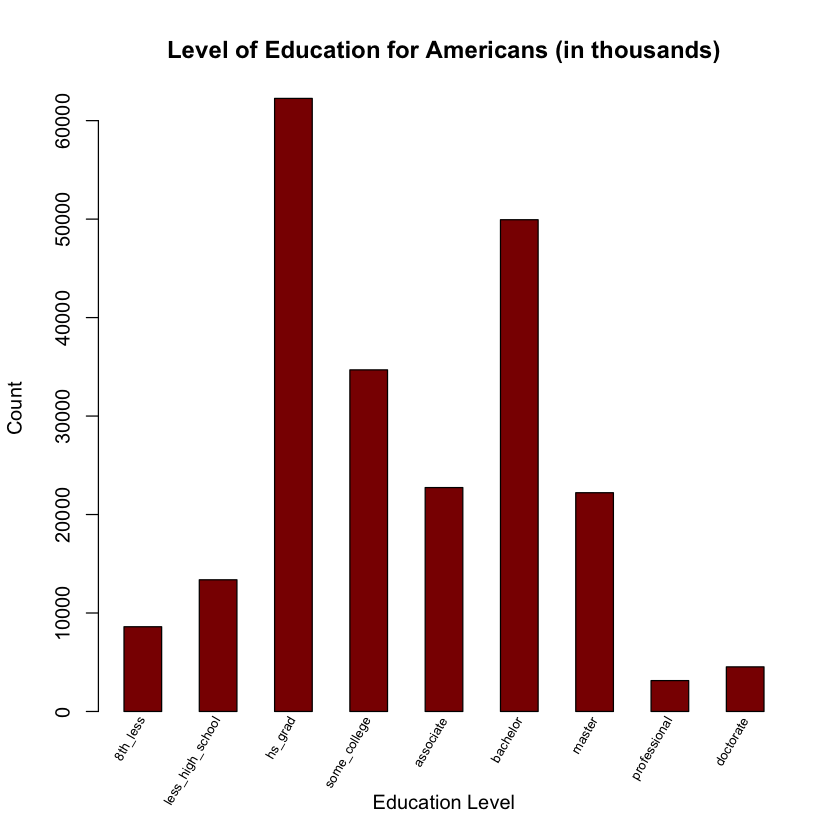

[1] " "


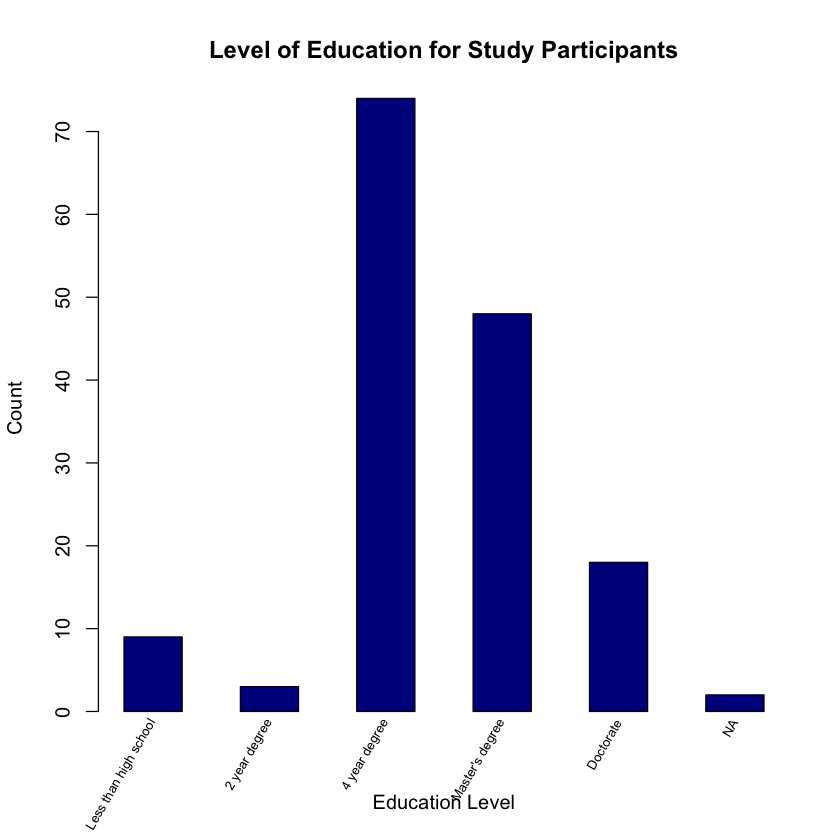

[1] " "


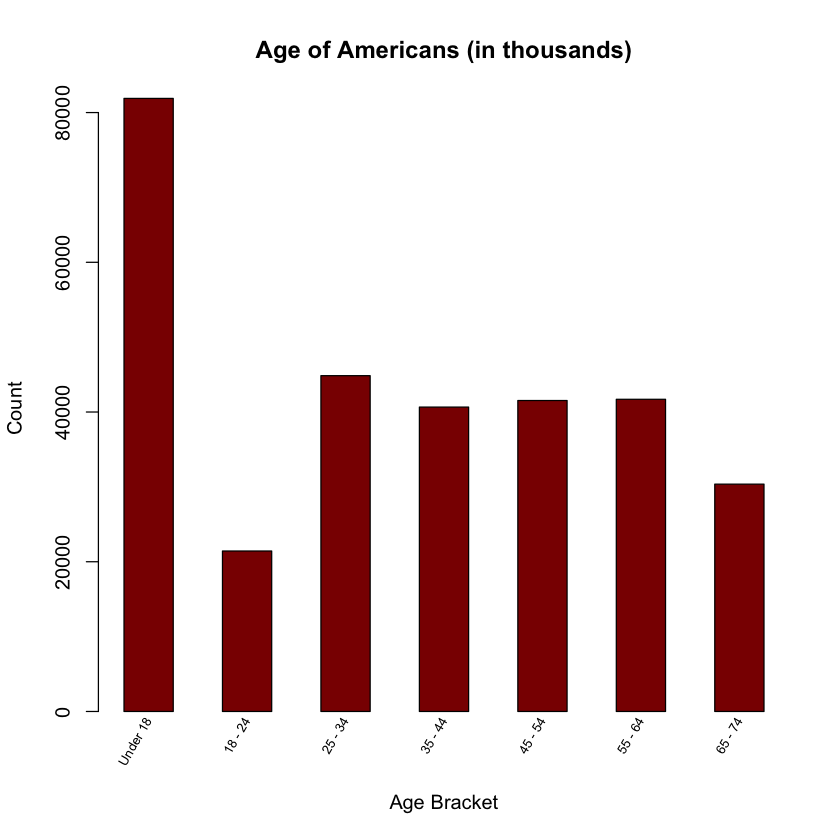

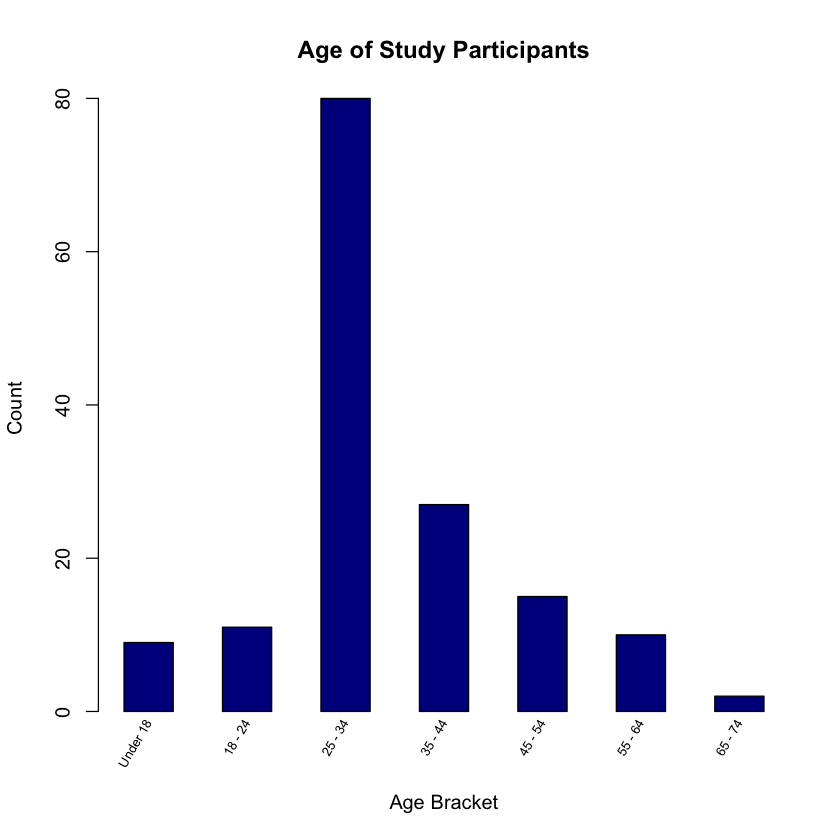

In [11]:
# American Education
labels <- c("8th_less", "less_high_school", "hs_grad", "some_college", "associate", "bachelor", "master", "professional", "doctorate")
data <- c(8603,	13372,	62259,	34690,	22738,	49937,	22214,	3136,	4529)
barplot(data,
main = "Level of Education for Americans (in thousands)",
xlab = "Education Level",
ylab = "Count",
col = "darkred", space = 1)
text(seq(1.5,17.5,by=2), par("usr")[3]-0.25, 
     srt = 60, adj= 1, xpd = TRUE,
     labels = labels, cex=0.65)
print(" ")

# Survey Education
labels <- c("Less than high school", "2 year degree", "4 year degree", 'Master\'s degree', "Doctorate", "NA")
data <- df %>%
  group_by(education) %>%
  summarize(no_rows = length(education))
barplot(data$no_rows,
main = "Level of Education for Study Participants",
xlab = "Education Level",
ylab = "Count",
col = "darkblue", space = 1)
text(seq(1.5,12.5,by=2), par("usr")[3]-0.25, 
     srt = 60, adj= 1, xpd = TRUE,
     labels = labels, cex=0.65)
print(" ")

# American Age
labels <- c('Under 18','18 - 24','25 - 34','35 - 44','45 - 54','55 - 64','65 - 74')
data <- c(81892, 21434, 44855, 40660, 41537, 41700, 30366)
barplot(data,
main = "Age of Americans (in thousands)",
xlab = "Age Bracket",
ylab = "Count",
col = "darkred", space = 1)
text(seq(1.5,14.5,by=2), par("usr")[3]-0.25, 
     srt = 60, adj= 1, xpd = TRUE,
     labels = labels, cex=0.65)
print(" ")

# Survey Age
labels <- c('Under 18','18 - 24','25 - 34','35 - 44','45 - 54','55 - 64','65 - 74')
data <- df %>%
  group_by(age) %>%
  summarize(no_rows = length(age))
barplot(data$no_rows,
main = "Age of Study Participants",
xlab = "Age Bracket",
ylab = "Count",
col = "darkblue", space = 1)
text(seq(1.5,14.5,by=2), par("usr")[3]-0.25, 
     srt = 60, adj= 1, xpd = TRUE,
     labels = labels, cex=0.65)

##### How accurate were the difficulty labels?

This boxplot shows that, in general, as the question gets harder, fewer people answered the question correctly. Although the median score on the medium problems was higher than the median score on the easy problems, the distribution of the medium scores was much wider. This indicates that, overall, the difficulty labels were correctly calibrated. 

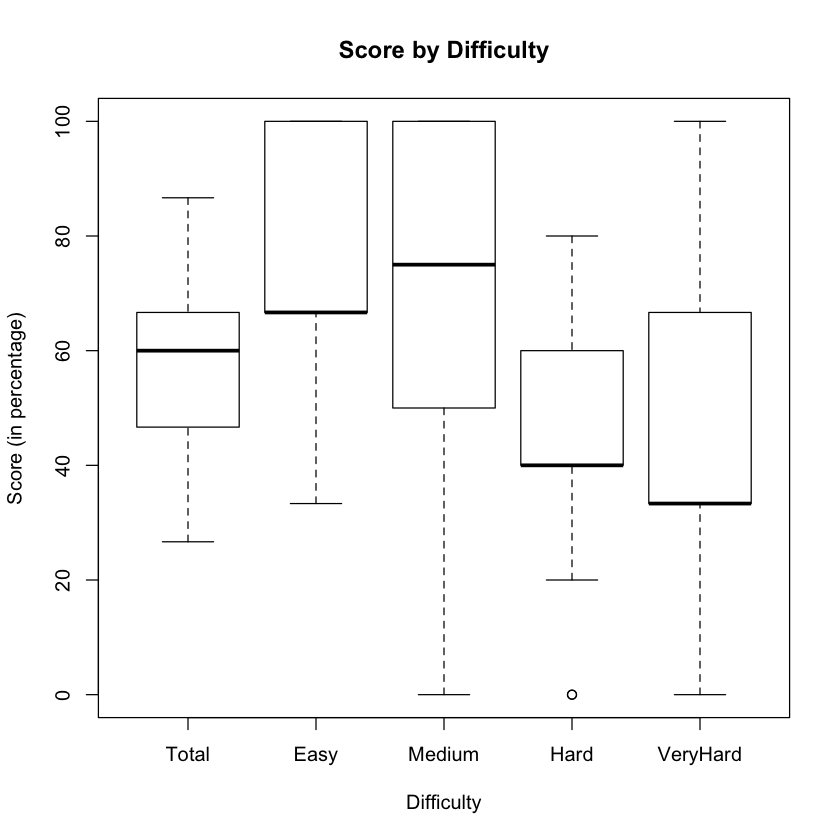

In [40]:
boxplot(df$Total_Pct,df$Easy_Pct,df$Medium_Pct, df$Hard_Pct, df$Very_Hard_Pct,
        names=c("Total","Easy","Medium","Hard","VeryHard"),
        main = "Score by Difficulty", ylab = "Score (in percentage)", xlab = "Difficulty")

Below is a plot and histogram of all scores, rounded off to nearest whole percent. Note that there are jumps in the plots because there are only 15 questions, so there are only 15 possible scores:

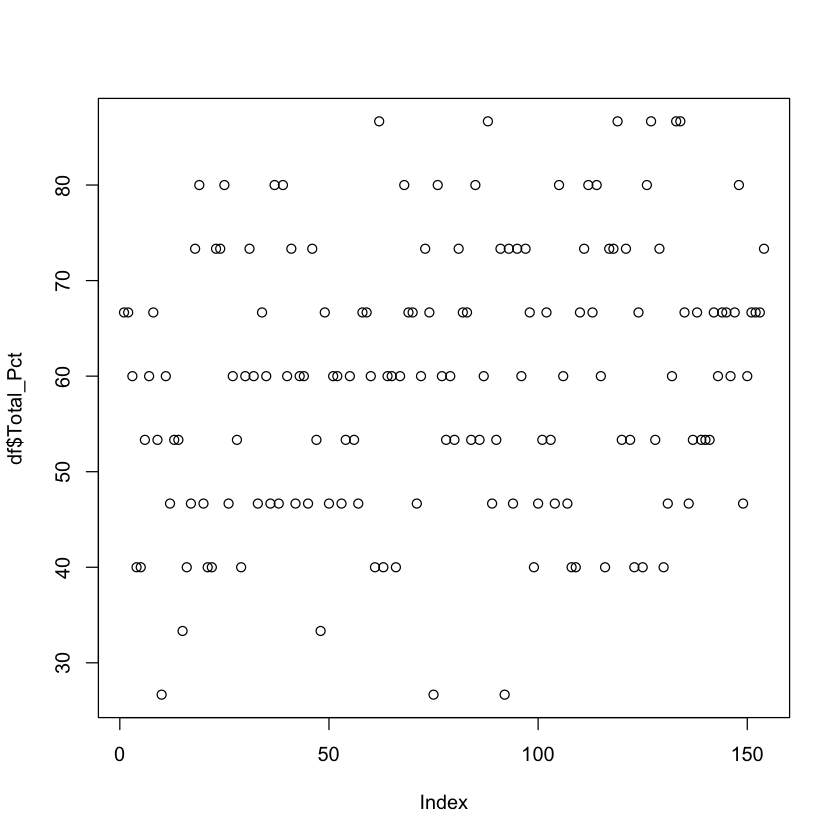

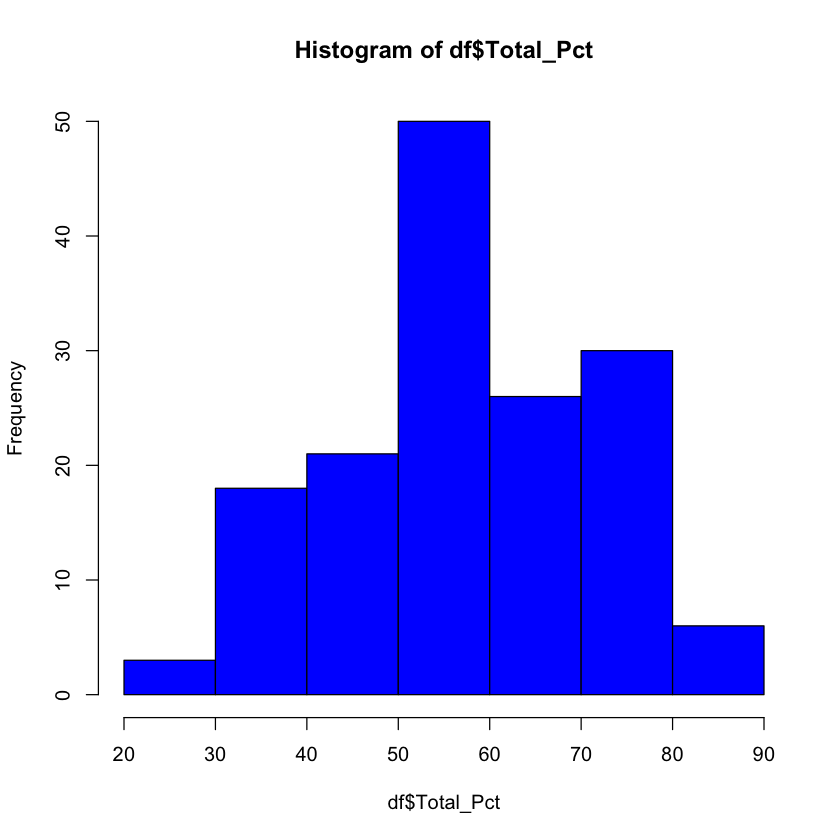

In [136]:
plot(df$Total_Pct, col = "black")
hist(df$Total_Pct, col = "blue", breaks = 8)

The survey respondants did not frequently answer questions about location or income, and there is a big skew in location data. The 'progress' column is a quirk of the software used and does not have useful information. As such, location, income, and progress information was removed for NEI. Rows that still had NA were removed. This leaves the experiment a sample size of 148.

In [166]:
df_noloc <- df[,!(names(df) %in% c("mid_atlantic", "midwest", "mountain", "new_england", "ne_midwest", "not_usa" , 
                                   "pacific", "south_atlantic", "west_south", "income", "progress"))]
## Which cols have na?
colnames(df_noloc)[colSums(is.na(df_noloc)) > 0]

## Which rows have na?
rownames(df_noloc)[rowSums(is.na(df_noloc)) > 0]

# Remove rows with NA
df_noloc <- na.omit(df_noloc)
nrow(df_noloc)

[1] "education" "gender"

[1] "1"   "60"  "84"  "88"  "99"  "118"

[1] 148

In [168]:
df <- read_csv("results_clean.csv")
df <- df[,!(names(df) %in% c("RecordedDate", "ResponseId", "Total", "Easy", "Medium", "Hard", "Very_Hard"))]
df <- df %>% rename(duration = `Duration (in seconds)`)
df$Finished <- as.numeric(df$Finished)
df$group <- as.numeric(df$group=="treatment")
head(df)

# I removed income, finished, progress, and location data for NEI
df_noloc <- df[,!(names(df) %in% c("mid_atlantic", "midwest", "mountain", "new_england", "ne_midwest", "not_usa" , "pacific", "south_atlantic", "west_south", "income", "Finished", "progress"))]

## Which cols have na?
colnames(df_noloc)[colSums(is.na(df_noloc)) > 0]

## Which rows have na?
rownames(df_noloc)[rowSums(is.na(df_noloc)) > 0]

# Remove rows with NA
df_noloc <- na.omit(df_noloc)
nrow(df_noloc)

x_vars <- model.matrix(Total_Pct ~  duration + challenge + education + gender + stress + age + group + retired + student + unemployed, df_noloc)[,-1]
y_var <- df_noloc$Total_Pct

cv_output <- cv.glmnet(x_vars, y_var, alpha = 1, lambda = lambda_seq)
cv_output$lambda.1se

Parsed with column specification:
cols(
  .default = col_double(),
  Finished = col_logical(),
  RecordedDate = col_character(),
  ResponseId = col_character(),
  group = col_character()
)

See spec(...) for full column specifications.



Progress,duration,Finished,challenge,education,gender,stress,income,age,group,⋯,mountain,new_england,ne_midwest,not_usa,pacific,south_atlantic,west_south,retired,student,unemployed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,334,1,2,5,NA,4,NA,3,0,⋯,0,0,0,1,0,0,0,0,0,1
100,1012,1,2,7,1,3,NA,3,0,⋯,0,1,0,0,0,0,0,0,0,0
100,1404,1,2,7,1,4,9,6,0,⋯,0,1,0,0,0,0,0,0,0,0
100,481,1,3,5,0,3,NA,4,0,⋯,0,1,0,0,0,0,0,0,0,0
100,283,1,2,1,0,1,NA,1,0,⋯,0,1,0,0,0,0,0,0,1,0
100,590,1,2,1,1,5,NA,1,0,⋯,0,0,0,0,0,1,0,0,1,0


[1] "education" "gender"

[1] "1"   "60"  "84"  "88"  "99"  "118"

[1] 148

[1] 1.584893

### Model Building

In this experiemnt, percent score is more important than sum score, so the sum score columns are removed. The date the survey was taken and response ID is unimportant, so those columns are removed as well. 

In [ ]:
# A little more cleanup
df_noloc <- df_noloc[,!(names(df_noloc) %in% c("RecordedDate", "ResponseId", "Total", "Easy", "Medium", "Hard", "Very_Hard"))]
df_noloc <- df_noloc %>% rename(duration = `Duration (in seconds)`)
df_noloc$group <- as.numeric(df_noloc$group=="treatment") #T/F is the subject in treatment or control?

Lasso regression is used to help with model selection. Our independent variable here is Total_Pct

In the graph below, each curve corresponds to a variable. It shows how each coefficient shrinks as λ varies. The top axis indicates the number of nonzero coefficients at the current λ. 

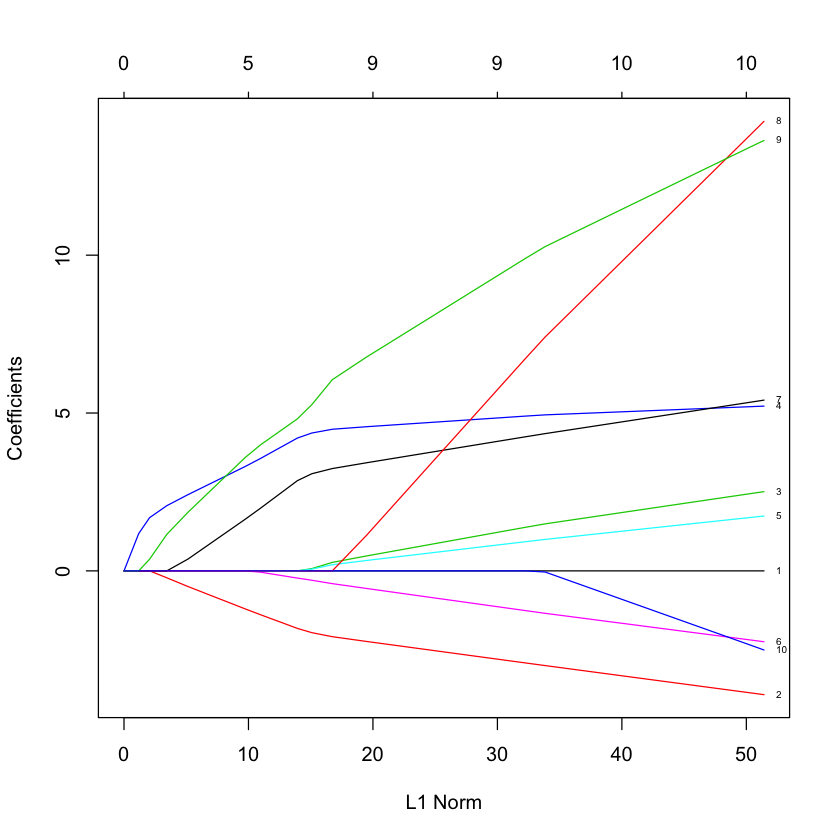

In [170]:
library(glmnet)
set.seed(26)

# individual difficulty columns are removed because they will be collinear with the independent variable. 
x_vars <- model.matrix(Total_Pct ~  duration + challenge + education + gender + stress + age + group + retired + student + unemployed, df_noloc)[,-1]
y_var <- df_noloc$Total_Pct

fit <- glmnet(x_vars,y_var)
plot(fit, label = TRUE)

Now, select the value for λ that minimizes cross-validation error. To do this, the data must be split into train and test sets. The plot below indicates that the cross-validation error is minimized when log(λ) is near 1.25. 

[1] 1.258925


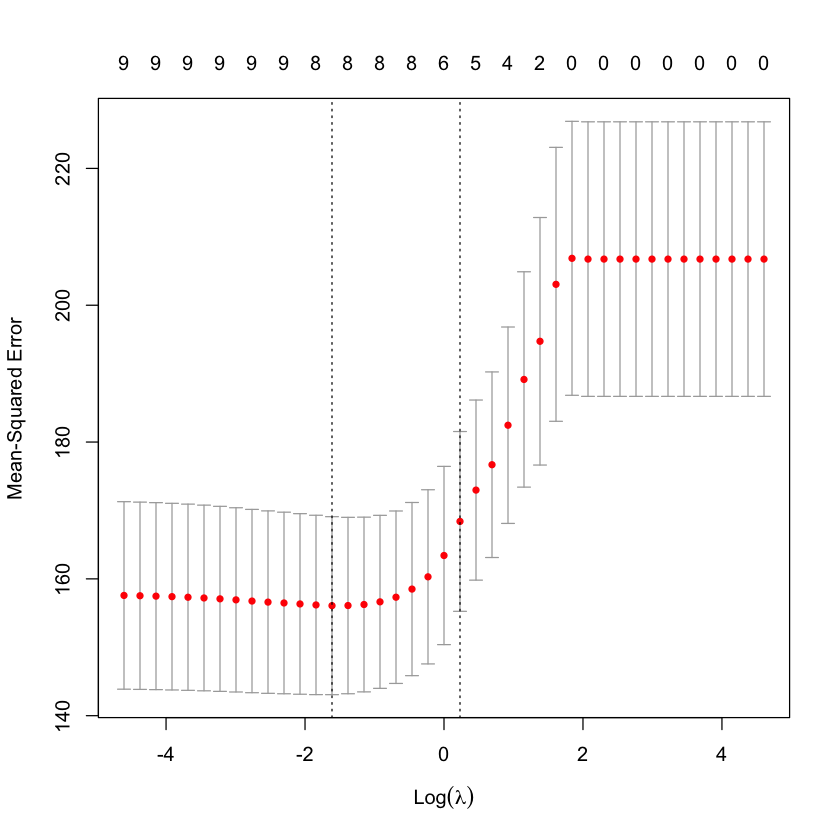

In [171]:
# Get options for lambda
lambda_seq <- 10^seq(2, -2, by = -.1)

# Create train and test data
train = sample(1:nrow(x_vars), nrow(x_vars)/2)
test = (-train)
y_test = y_var[test]

# Find best lambda based on train data
cv_output <- cv.glmnet(x_vars[train,], y_var[train], alpha = 1, lambda = lambda_seq)
plot(cv_output)
print(cv_output$lambda.1se)  #or cv_output$lambda.min

The code below shows what the model would look like if we used the λ that minimizes MSE vs. the model if we choose the most regularized (i.e. smallest number of parameters) that is within one standard deviation of the minimum. Here, the second option is chosen to create the model, for parsimony.

In [172]:
coef(cv_output, s="lambda.min")
print("--------------------------------------------")
coef(cv_output, s="lambda.1se")

11 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  5.424099e+01
duration    -4.578698e-05
challenge   -4.487477e+00
education    2.726092e+00
gender       8.055461e+00
stress       7.768035e-01
age         -3.325042e+00
group        5.343882e+00
retired      .           
student      9.634760e+00
unemployed   .           

[1] "--------------------------------------------"


11 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 62.7836773
duration     .        
challenge   -3.3626292
education    0.6133587
gender       7.0842866
stress       .        
age         -1.8056559
group        3.6654658
retired      .        
student      2.7442505
unemployed   .        

In [173]:
best_lam <- cv_output$lambda.1se #or cv_output$lambda.min
best_lam

[1] 1.258925

In [174]:
# Rebuild model with best lambda
lasso_best <- glmnet(x_vars[train,], y_var[train], alpha = 1, lambda = best_lam)

# Inspect beta coefficinets
coef(lasso_best)

11 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 62.7835235
duration     .        
challenge   -3.3626930
education    0.6134311
gender       7.0842245
stress       .        
age         -1.8056740
group        3.6654656
retired      .        
student      2.7444329
unemployed   .        

Now, accuracy can be tested. First, a dataframe of predicted and final scores is created. Then, the residual sum of squares is computed based on that dataframe. 

In [175]:
# How did the model do?
pred <- predict(lasso_best, s = best_lam, newx = x_vars[test-1,])
final <- cbind(y_var[test-1], pred)
head(final)

# accuracy of the lasso model:
actual <- final[,1]
predicted <- final[,2]
rss <- sum((predicted-actual)^2)
tss <- sum((actual - mean(actual))^2)
rsq <- 1-(rss/tss)
rsq

,,1
1,66.66667,62.01936
3,40.00000,48.53990
5,53.33333,64.69455
7,66.66667,48.53990
8,53.33333,50.34558
9,26.66667,47.59632


[1] 0.1858028

Here, R squared = .186. This means that our model explains 18% of the variance in our data. This is worth keeping in mind if big decisions are made based on this data.

## Summarize Results

Now, conclusions can be drawn from the model. The coefficients of the model are reproduced below. I will talk about each variable. 

NOTE: Because there are 15 questions, each question was worth 6.67% of the total score. 

In [134]:
1/15

[1] 0.06666667

In [133]:
coef(lasso_best)

11 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 62.7835235
duration     .        
challenge   -3.3626930
education    0.6134311
gender       7.0842245
stress       .        
age         -1.8056740
group        3.6654656
retired      .        
student      2.7444329
unemployed   .        

#### duration     .       
The duration indicated how long a subject took to complete the survey. This variable was deemed unimportant and was shrunk to zero during the lasso model selection. 


#### challenge   -3.3626930
Part of the survey asked the subject how challenging they thought the survey was, on a scale of 1 to 5. Each increase in percieved difficulty decreased the subjects score by -3.4%. This makes sense. 

#### education    0.6134311
Education was split into groups: less than high school, high school diploma, 2 years of college, 4 years of college, master's degree, and Ph.D. Each move up this scale increased the subject's score by 0.6%. Perhaps more experienced students are better at taking tests. Although this result is statiscially significant, this amounts to a practical significance of one tenth of a question. 

#### gender       7.0842245
Identifying as male incrased the subject's score by 7.1%. It is difficult to determine from this survey why that might be. Perhaps men are better test takers. Perhaps men are more likely to be in a quantitative field, and do better on math questions. Perhaps men are the target audience for the pop culture referenced in the questions. 

#### stress       .        
When my team created this survey, we were concerned that revealing the true purpose of the study would influence the result. As such, we told our subjects that the survey was about the effects of stress on test performance, and asked them to rate how stressed they have felt in the past week compared to how stressed they felt in the past 6 months. As expected, this variable came up insignificant. 

#### age         -1.8056740
In this survey, younger people scored higher by 1.8%. It could be that younger people are either still in school, or more recently left school. This would help them answer the math, grammer, and science questions. It could also be that younger students are more aware of pop culture, and could have answered better on those questions. More analysis of the data would need to be done to determine which is the case. 

### group        3.6654656
   This is the main variable of interest. Subjects in the treatent group scored 3.7% higher than subjects in control. This means that the presence of difficulty lables did help them on the exam. This could be for a couple of reasons:
1. The 'easy' label helped students feel confident in their answers.
2. The 'very hard' label encouraged harder work.

This experiement has shown that difficulty labels do have an effect, but more research would need to be done to explain exactly why this effect is found.  A few possible follow-up experiemnts:
  - Create one experiment that was only math questions, one experiment that was only grammar questions, etc., to see if the effect is more significant in some fields than others.  
  - Create a survey with questions that tested more diverse subject matters: the more diverse the questions, the more likely it is that respondents would have to reach beyond their existing domain expertise.
  - In this survey, my team tried to accurately label the difficulty of questions. In a future study, the difficulty label could be randomized on the questions. This would tell the researcher if a difficult label on an easy question affects the outcome when compared to an easy label on an easy question. 

Although this study indicates that difficulty labels do affect test scores, the low r-squred value that the model produced is concerning. This research shows that there could be a link, but a more detailed research study should be done before big decisions that rely on this outcome are made. 

One possible general enhancement would be a longer survey with more questions, which would allow researchers to measure the impact of difficulty labels on a more granular scale.  With the 15 questions used in this survey, each additional question answered correctly added 6.7% to the total percentage score.  If the survey had 30 questions, it would cut that increase in half, allowing for a more detailed look at differences. 

Another possible enhancement would be to create more thoughtfully-crafted questions for a more specific target audience. The questions in this survey had to be general knowledge. My team has friends, family, and coworkers in a wide variety of fields with a wide variety of interests. We tried to select questions that would be suitable for this diverse set of people, but we are a team of data scientists, not test-writers. As such, someone may have missed a question simply because they don't like basketball, or haven't seen a James Bond movie. 

If a researcher could select a more specific target audience, then the survey could be more tailored to that audience's interest, and the results would be more meaningful. For example, if the target audience is second graders, then the same structure of experiemnt could be made with second-grade level questions. This would provide more robust results. Nonetheless, this experiemnt indicates that a link may exist and a further study would be worthwile. 
 

#### retired      .      
Being retired did not affect a subject's result. 

#### student      2.7444329
Being a current student helped a subject's score by 2.7%. This is likely because students are more recently experienced test takers. 

#### unemployed   . 
Being unemployed did not affect a subject's result.

## Conclusion

In this post, I have walked through a real-world experiment. First, my team made sure we were asking a good question. Then, we collected data through a qualtrics survey. The data was cleaned and anaylzed. The result was that the presence of difficulty lables does appear to help test-takers perform well on an exam, but a more detailed and targeted study would need to be done to confirm this. 

## Appendix

**Bibliography:**

Heitmann, Svenja, et al. “Testing Is More Desirable When It Is Adaptive and Still Desirable When Compared to Note-Taking.” Frontiers in Psychology, Frontiers Media S.A., 18 Dec. 2018, www.ncbi.nlm.nih.gov/pmc/articles/PMC6305602/.

Ponsoda, Vicente, et al. “The Effects of Test Difficulty Manipulation in Computerized Adaptive Testing and Self-Adapted Testing.” Applied Measurement in Education, vol. 12, no. 2, 1999, pp. 167–184., doi:10.1207/s15324818ame1202_4.

US Census Bureau. “Age and Sex Composition in the United States: 2018.” The United States Census Bureau, 11 July 2019, www.census.gov/content/census/en/data/tables/2018/demo/age-and-sex/2018-age-sex-composition.html.

US Census Bureau. “Educational Attainment in the United States: 2019.” The United States Census Bureau, 30 Mar. 2020, www.census.gov/data/tables/2019/demo/educational-attainment/cps-detailed-tables.html.

#### The answers to the survey are provided below.
 

EASY - How many continents are there in the world?
*Answer: 7*

EASY - What is regulation height for a basketball hoop?
*Answer: 10 feet*
 

EASY - What is the sum of the angles of a triangle?
*Answer: 180 degrees*
 

MEDIUM - Who wrote the book Frankenstein?
*Answer: Mary Shelley*


MEDIUM - In Harry Potter, what does the Imperius Curse do?
*Answer: controls*


MEDIUM - How many sides are there in a decagon?
*Answer: 10*

MEDIUM - Select the correct way to write the bold part of this sentence: Hospitals are increasing the hours of doctors, ***significantly affecting the frequency of surgical errors, which already are a cost to hospitals of*** millions of dollars in malpractice lawsuits.
*Answer: significantly affecting the frequency of surgical errors, which already cost hospitals*


HARD - Who invented the rabies vaccination?
*Answer: Louis Pasteur*


HARD - One day, a person went to a horse racing area. Instead of counting the number of humans and horses, he counted 74 heads and 196 legs. How many humans and horses were there?
*Answer: 24 horses and 50 humans*


HARD - What is the only US state that only touches one other state?
*Answer: Maine*


HARD - Which of these cars did James Bond not drive in any of the James Bond films?
*Answer: Acura*

HARD - The average temperature of the last six days is 44 degrees. The median temperature is 36. If Tuesday was the warmest of the six days, what was the lowest possible temperature Tuesday could have had?
*Answer: 60*

VERY HARD - Rephrase this sentence so it has the same meaning: "If you don't keep calm, I shall shoot you," he said to her in a calm voice.
*Answer: He warned her calmly that he would shoot her if she didn't keep quiet.*

VERY HARD - Which gas is formed when a hydrogen bomb is detonated?
*Answer: Helium*

VERY HARD - How many ways can the letters of the word PUZZLE be scrambled so that the first and the last letters are both vowels?
*Answer: 24*